</style>
<h1  style="text-align:center;font-size:60px">  Machine Learning Projects
    <h2 style="text-align:center">Quickdraw Subset : Quickdraw dataset 24</h2>
    <br><br>
    <h2 style="text-align:left;font-size:20px">
        <u> Date:</u> April 2021 <br><br>
        <u> Groupe 24:</u><br><br>
          <li>Anas Krichel ( anas.krichel@telecom-paris.fr )</li>
          <li>Maha Meihemid ( meihemid.meihemid@telecom-paris.fr )</li>
          <li>Louis Dorge ( ldorge@telecom-paris.fr )</li><br> 
     </h2>
</h1>

# I.Data Set : Quickdraw dataset 24¶

## Data Set Informartion :

we have data set of hand drawing images of two types 'ant' and 'grapes'. The task is to build a classifier that is able to recognize if an unseen image is 'ant' or 'grapes'

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras import optimizers

In [2]:
#############Loading the Data#######################
####################################################

a = np.load('G_24_grapes.npy')
b = np.load('G_24_ant.npy')

ya = np.ones(1000)
yb = np.zeros(1000)

X_train = np.concatenate((a, b))
y_train = np.concatenate((ya, yb))


X_test = np.load('test_images.npy')
y_test = np.load('test_labels.npy')

In [3]:
X_test.shape

(1000, 784)

In [4]:
##############Neural network model##########################
############################################################

input_shape = X_train[1].shape
output_shape = 1

model = Sequential()
# 1000 neurone in the first hiden layer
model.add(Dense(1000, input_shape=input_shape, activation='sigmoid'))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(output_shape, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])  # Learning the parameters

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1001      
Total params: 3,789,001
Trainable params: 3,789,001
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
63/63 [==============================] - 9s 117ms/step - loss: 0.7486 - accuracy: 0.6336 - val_loss: 0.4509 - val_accuracy: 0.8000
Epoch 2/10
63/63 [==============================] - 3s 52ms/step - loss: 0.4416 - accuracy: 0.8133 - val_loss: 0.4502 - val_accuracy: 0.8120
Epoch 3/10
63/63 [==============================] - 3s 52ms/step - loss: 0.4476 - accuracy: 0.8265 - val_loss: 0.4518 - val_accuracy: 0.8120
Epoch 4/10
63/63 [==============================] - 4s 57ms/step - loss: 0.4425 - accuracy: 0.8232 - val_loss: 0.4377 - val_accuracy: 0.8110
Epoch 5/10
63/63 [==============================] - 4s 58ms/step - loss: 0.4374 - accuracy: 0.8325 - val_loss: 0.4386 - val_accuracy: 0.8070
Epoch 6/10
63/63 [==============================] - 3s 55ms/step - loss: 0.4114 - accuracy: 0.8359 - val_loss: 0.4420 - val_accuracy: 0.8140
Epoch 7/10
63/63 [==============================] - 3s 54ms/step - loss: 0.4211 - accuracy: 0.8340 - val_loss: 0.4468 - val_accuracy: 0.8090
Epoch 8/10
6

# **Some plots To visualize the loss and accuracy of the classifier**

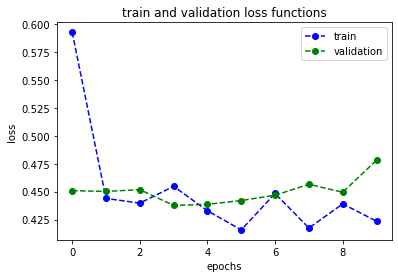

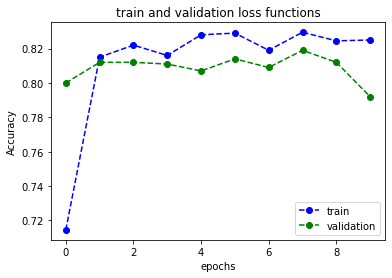

In [6]:
# We plot here the loss as function of epochs
plt.plot(history.history["loss"], 'bo--')
plt.plot(history.history["val_loss"], 'go--')
plt.title("train and validation loss functions")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

# END CODE HERE
plt.show()
###############################################################################
###############################################################################

# summarize history for accuracy
# START CODE HERE
# START CODE HERE
# We plot here the accuracy as function of epochs

plt.plot(history.history["accuracy"], 'bo--')
plt.plot(history.history["val_accuracy"], 'go--')
plt.title("train and validation loss functions")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

# END CODE HERE
plt.show()

# **Some Ideas to avoid overfiting**

Our first model seems able to generalize what it learned on the training data to unseen data. Any way we will use the methode dropout hopfully to increase the accuracy on the test data.

In fact the method use the fact that : shuting down some neurones will prevent the minimizer to find the obvious model which in some how interpolat the data wich cause overfiting.

In [7]:
input_shape = X_train[1].shape
output_shape = 1

model2 = Sequential()
# 300 neurone in the hiden layer
model2.add(Dense(1000, input_shape=input_shape, activation='sigmoid'))
model2.add(Dropout(0.5))

model2.add(Dense(1000, activation='sigmoid'))
model2.add(Dropout(0.5))

model2.add(Dense(1000, activation='sigmoid'))
model2.add(Dropout(0.5))

model2.add(Dense(1000, activation='sigmoid'))


model2.add(Dense(output_shape, activation='sigmoid'))


model2.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)             

In [8]:
history2 = model2.fit(X_train, y_train, batch_size=32,
                      epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
63/63 [==============================] - 6s 78ms/step - loss: 0.7729 - accuracy: 0.5470 - val_loss: 0.4495 - val_accuracy: 0.8050
Epoch 2/10
63/63 [==============================] - 4s 58ms/step - loss: 0.4888 - accuracy: 0.7945 - val_loss: 0.4523 - val_accuracy: 0.8020
Epoch 3/10
63/63 [==============================] - 4s 59ms/step - loss: 0.5120 - accuracy: 0.7765 - val_loss: 0.4743 - val_accuracy: 0.8040
Epoch 4/10
63/63 [==============================] - 3s 54ms/step - loss: 0.5266 - accuracy: 0.7744 - val_loss: 0.4483 - val_accuracy: 0.7980
Epoch 5/10
63/63 [==============================] - 4s 57ms/step - loss: 0.4735 - accuracy: 0.7893 - val_loss: 0.4597 - val_accuracy: 0.8040
Epoch 6/10
63/63 [==============================] - 4s 58ms/step - loss: 0.4756 - accuracy: 0.8159 - val_loss: 0.4519 - val_accuracy: 0.7960
Epoch 7/10
63/63 [==============================] - 4s 58ms/step - loss: 0.4701 - accuracy: 0.8085 - val_loss: 0.5213 - val_accuracy: 0.8000
Epoch 8/10
63

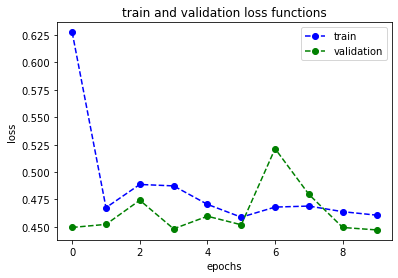

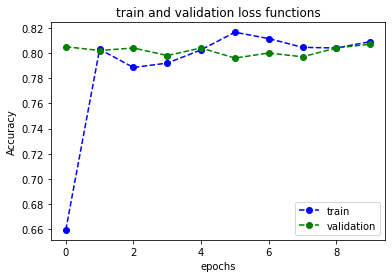

In [9]:
# We plot here the loss as function of epochs
plt.plot(history2.history["loss"], 'bo--')
plt.plot(history2.history["val_loss"], 'go--')
plt.title("train and validation loss functions")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

# END CODE HERE
plt.show()
###############################################################################
###############################################################################

# summarize history for accuracy
# START CODE HERE
# START CODE HERE
# We plot here the accuracy as function of epochs

plt.plot(history2.history["accuracy"], 'bo--')
plt.plot(history2.history["val_accuracy"], 'go--')
plt.title("train and validation loss functions")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

# END CODE HERE
plt.show()

It did not increases the accuracy very much since our model already did not overfit the data.

# **convolutional neural network**

This model is known to be very efficient on images, since it does not loose the structure of the image. In contrast the MLP take the images as vectors which make cause the loss of the information. 
This model was not in the lectures but I red about it in some articles

In [10]:
X_train.shape
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

In [11]:
from tensorflow.keras import datasets, layers

model = Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history3 = model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
63/63 [==============================] - 4s 41ms/step - loss: 6.9317 - accuracy: 0.6696 - val_loss: 0.5774 - val_accuracy: 0.7770
Epoch 2/10
63/63 [==============================] - 2s 38ms/step - loss: 0.4080 - accuracy: 0.8385 - val_loss: 0.4881 - val_accuracy: 0.7950
Epoch 3/10
63/63 [==============================] - 2s 38ms/step - loss: 0.2805 - accuracy: 0.8828 - val_loss: 0.3529 - val_accuracy: 0.8560
Epoch 4/10
63/63 [==============================] - 4s 62ms/step - loss: 0.2135 - accuracy: 0.9086 - val_loss: 0.3450 - val_accuracy: 0.8630
Epoch 5/10
63/63 [==============================] - 2s 38ms/step - loss: 0.1608 - accuracy: 0.9403 - val_loss: 0.3314 - val_accuracy: 0.8740
Epoch 6/10
63/63 [==============================] - 2s 37ms/step - loss: 0.1069 - accuracy: 0.9652 - val_loss: 0.3374 - val_accuracy: 0.8750
Epoch 7/10
63/63 [==============================] - 2s 36ms/step - loss: 0.1013 - accuracy: 0.9689 - val_loss: 0.3361 - val_accuracy: 0.8770
Epoch 8/10
63

We can notice that there is a litle bit of the overfiting phenomenon, but the fact that the accuracy on the testing data is height make us relief.


# **Conclusion** 

I learned that in machine learning there is a trade off between the accuracy on the training data and the testing data. We don't want to underfit and also not to overfit. It seems that avoiding overfiting is more challenging than avoiding underfiting. We did use dropout in this project to avoid overfiting.

I learned also that the hyper-parameteres are very important in finding the best model. It is also difficult to find them. For exemple in the situation of deep learning, the number of lyeres and neurones can be seen as hyper parameters. I found theme by manuel testing, but we can also finding theme throught cross validation.